# **Práctica 3: Análisis exploratorio de datos**

Nombre: Casasola García Oscar

No. Cuenta: 316123747

Email: oscar.casasola.g7@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un análisis exploratorio de datos con base en información obtenida de Yahoo Finanzas. Por ejemplo, datos de Spotify, Facebook, Amazon y Aeromexico.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [3]:
%pip install yfinance
#%pip install googlefinance

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

# 1. Análisis para Spotify

In [2]:
# Para Spotify
DataSpotify = yf.Ticker('SPOT')
DataSpotify

yfinance.Ticker object <SPOT>

In [12]:
today = pd.Timestamp.today()
SpotifyHist = DataSpotify.history(start = '2019-1-1', end = today, interval = '1d')
SpotifyHist
# Se muestran los primeros 10 valores: 
# * SpotifyHist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,111.660004,115.629997,110.360001,113.739998,861100,0,0
2019-01-03,112.080002,113.345001,108.589996,109.019997,1082300,0,0
2019-01-04,112.059998,121.470001,111.500000,118.510002,2484800,0,0
2019-01-07,115.040001,123.865997,113.279999,119.360001,2516200,0,0
2019-01-08,121.440002,122.769997,114.699997,117.480003,1257100,0,0
...,...,...,...,...,...,...,...
2022-09-02,107.550003,108.290001,103.360001,104.419998,1405300,0,0
2022-09-06,104.059998,104.370003,100.620003,102.589996,962800,0,0
2022-09-07,102.349998,106.279999,102.349998,105.860001,652300,0,0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

## **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [4]:
SpotifyHist.shape

(928, 7)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [5]:
SpotifyHist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

Se observa que los datos son numéricos (flotante y entero).

## Paso 2: Identificación de datos faltantes

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [6]:
SpotifyHist.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [7]:
SpotifyHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 928 entries, 2019-01-02 to 2022-09-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          928 non-null    float64
 1   High          928 non-null    float64
 2   Low           928 non-null    float64
 3   Close         928 non-null    float64
 4   Volume        928 non-null    int64  
 5   Dividends     928 non-null    int64  
 6   Stock Splits  928 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 58.0 KB


## Paso 3: Detección de valores atípicos

### 1) Distribución de variables numéricas

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

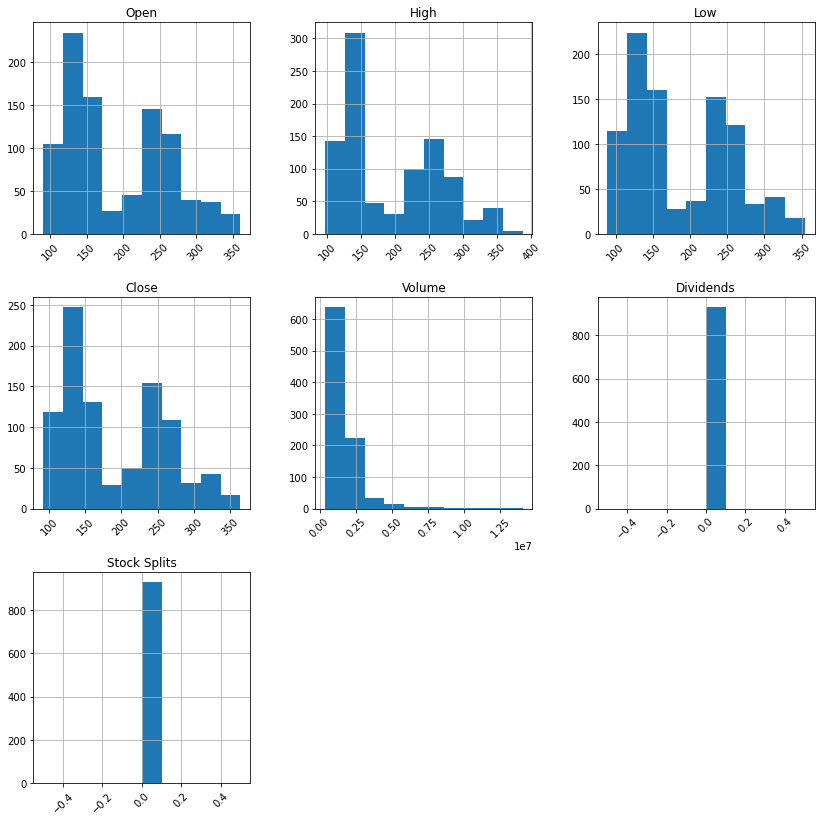

In [8]:
SpotifyHist.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma se observa que **Volume** tiene valores sesgados a la izquierda. Las variables **Dividens** y **Stock Splits** presentan valores en 'cero'.

### 2) Resumen estadístico de variables numéricas

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [9]:
SpotifyHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,928.000000,928.000000,928.000000,928.000000,9.280000e+02,928.0,928.0
mean,191.646390,195.605927,187.637602,191.667758,1.738210e+06,0.0,0.0
std,68.571980,70.010612,66.978685,68.475777,1.317899e+06,0.0,0.0
min,90.440002,97.070000,89.029999,91.940002,3.945000e+05,0.0,0.0
25%,136.515003,139.740002,134.285000,137.150002,1.050350e+06,0.0,0.0
50%,153.595001,156.855003,151.012497,154.339996,1.383300e+06,0.0,0.0
75%,249.719994,254.449997,245.337498,249.709995,1.987425e+06,0.0,0.0
max,360.910004,387.440002,354.178009,364.589996,1.404930e+07,0.0,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### 3) Diagramas para detectar posibles valores atípicos

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


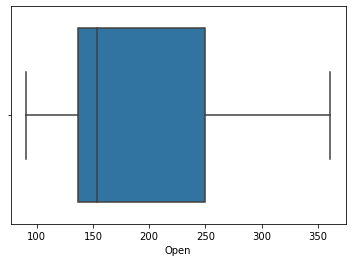

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


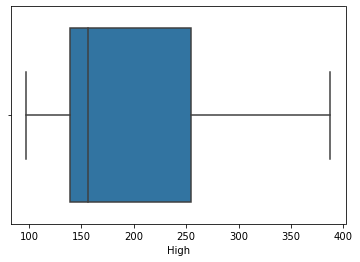

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


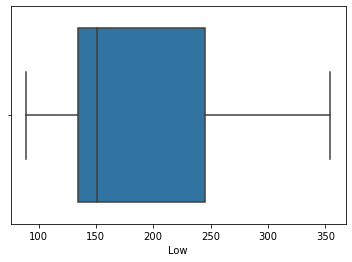

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


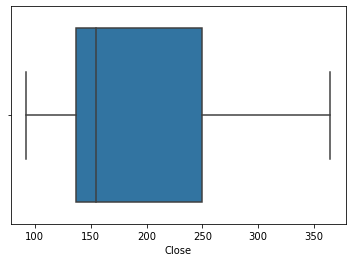

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


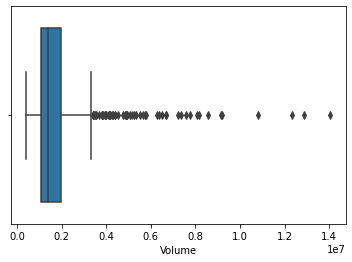

In [14]:
VariablesValoresAtipicos = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=SpotifyHist)
  plt.show()

Se observa que en Volume se tienen valores atípicos que están lejos de los otros valores.

### 4. Plot

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo las tres columnas con 10 o menos clases usando series.**nunique() < 10**.


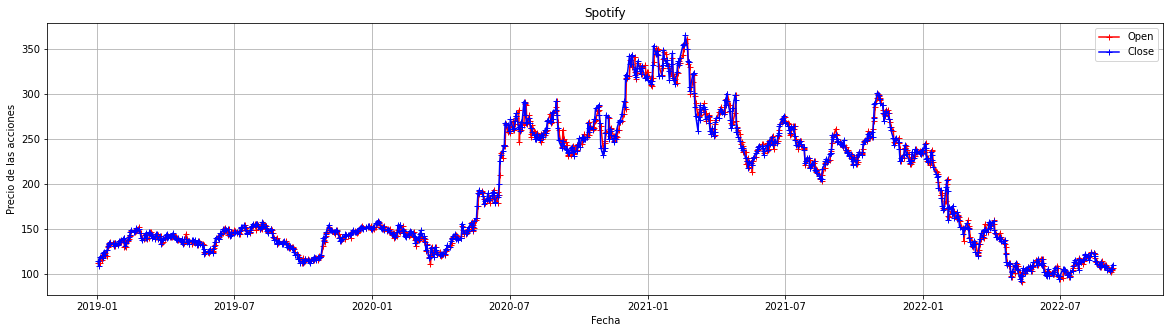

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(SpotifyHist['Open'], color='red', marker='+', label='Open')
plt.plot(SpotifyHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Spotify')
plt.grid(True)
plt.legend()
plt.show()

## Paso 4: Identificación de relaciones entre pares variables

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [16]:
SpotifyHist.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.998377,0.998518,0.996630,-0.025760,NaN,NaN
High,0.998377,1.000000,0.998191,0.998539,-0.003286,NaN,NaN
Low,0.998518,0.998191,1.000000,0.998482,-0.035307,NaN,NaN
Close,0.996630,0.998539,0.998482,1.000000,-0.016446,NaN,NaN
Volume,-0.025760,-0.003286,-0.035307,-0.016446,1.000000,NaN,NaN
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


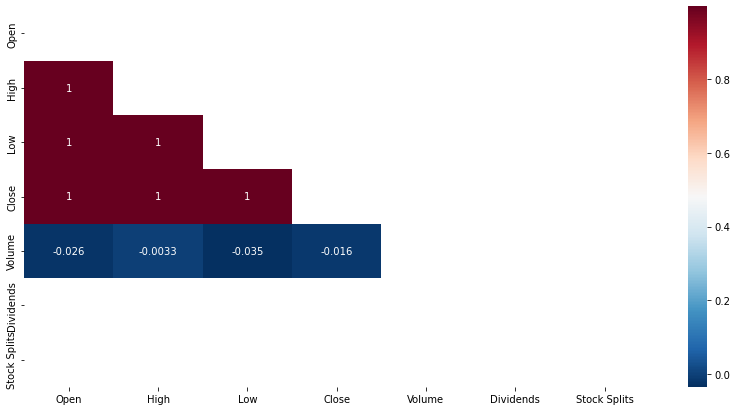

In [17]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(SpotifyHist.corr())
sns.heatmap(SpotifyHist.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.


# Análisis para Facebook
A continuación, se incluye el análisis de otras fuentes de datos:

In [18]:
# Para Facebook
DataFacebook = yf.Ticker('META')

In [19]:
FacebookHist = DataFacebook.history(start = '2019-1-1', end = today, interval='1d')
FacebookHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,28146200,0,0
2019-01-03,134.690002,137.169998,131.119995,131.740005,22717900,0,0
2019-01-04,134.009995,138.000000,133.750000,137.949997,29002100,0,0
2019-01-07,137.559998,138.869995,135.910004,138.050003,20089300,0,0
2019-01-08,139.889999,143.139999,139.539993,142.529999,26263800,0,0
...,...,...,...,...,...,...,...
2022-09-02,167.449997,167.929993,159.220001,160.320007,22609100,0,0
2022-09-06,160.100006,161.690002,157.690002,158.539993,19339800,0,0
2022-09-07,157.759995,160.960007,156.809998,160.389999,16831200,0,0


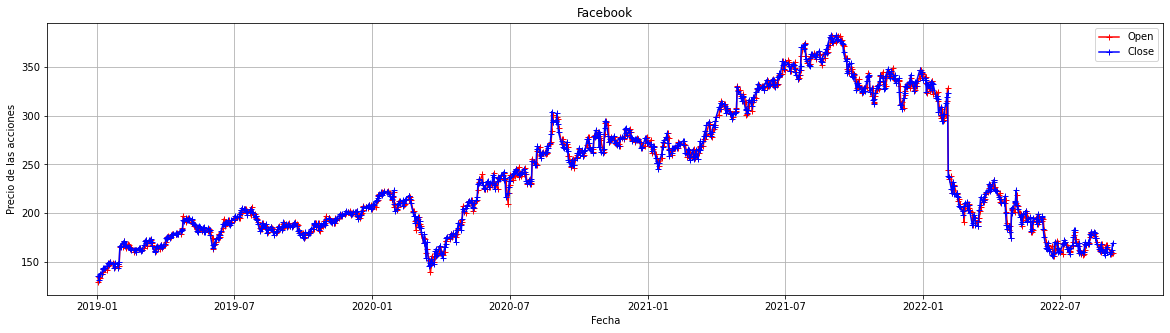

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(FacebookHist['Open'], color='red', marker='+', label='Open')
plt.plot(FacebookHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Facebook')
plt.grid(True)
plt.legend()
plt.show()

# Análisis para Amazon

In [21]:
# Para Amazon
DataAmazon = yf.Ticker('AMZN')

In [22]:
AmazonHist = DataAmazon.history(start = '2019-1-1', end = today, interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,73.260002,77.667999,73.046501,76.956497,159662000,0,0.0
2019-01-03,76.000504,76.900002,74.855499,75.014000,139512000,0,0.0
2019-01-04,76.500000,79.699997,75.915497,78.769501,183652000,0,0.0
2019-01-07,80.115501,81.727997,79.459503,81.475502,159864000,0,0.0
2019-01-08,83.234497,83.830498,80.830498,82.829002,177628000,0,0.0
...,...,...,...,...,...,...,...
2022-09-02,129.500000,131.380005,126.389999,127.510002,57378500,0,0.0
2022-09-06,127.919998,128.619995,124.739998,126.110001,43888600,0,0.0
2022-09-07,126.120003,129.820007,125.400002,129.479996,47900300,0,0.0


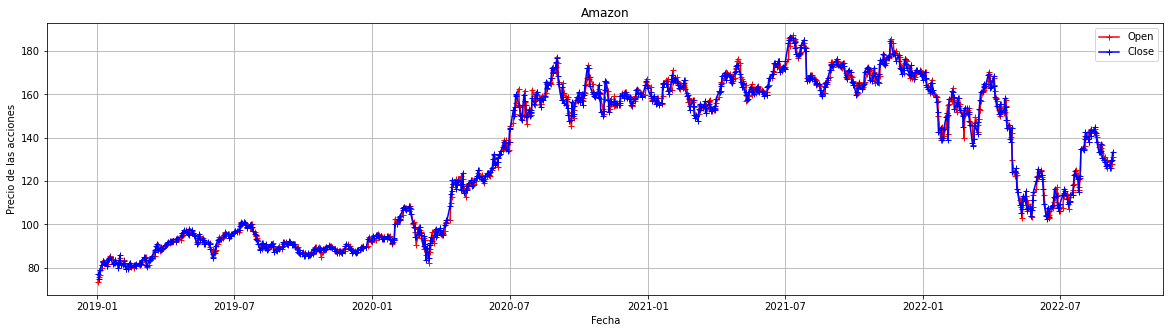

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='red', marker='+', label='Open')
plt.plot(AmazonHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

# Análisis para Aeroméxico

In [24]:
# Para Aeroméxico
DataAeromex = yf.Ticker('AEROMEX.MX')

In [25]:
AeromexHist = DataAeromex.history(start = '2019-1-1', end = today, interval='1d')
AeromexHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,22.000000,23.080000,22.000000,22.530001,54890,0,0
2019-01-03,22.500000,23.049999,22.500000,22.770000,88098,0,0
2019-01-04,23.430000,23.840000,22.780001,23.160000,69569,0,0
2019-01-07,23.180000,24.500000,23.100000,23.270000,160120,0,0
2019-01-08,23.219999,23.870001,22.820000,23.230000,190421,0,0
...,...,...,...,...,...,...,...
2022-09-02,198.979996,198.979996,198.979996,198.979996,0,0,0
2022-09-05,198.979996,198.979996,198.979996,198.979996,0,0,0
2022-09-06,192.470001,192.470001,191.460007,191.460007,567,0,0


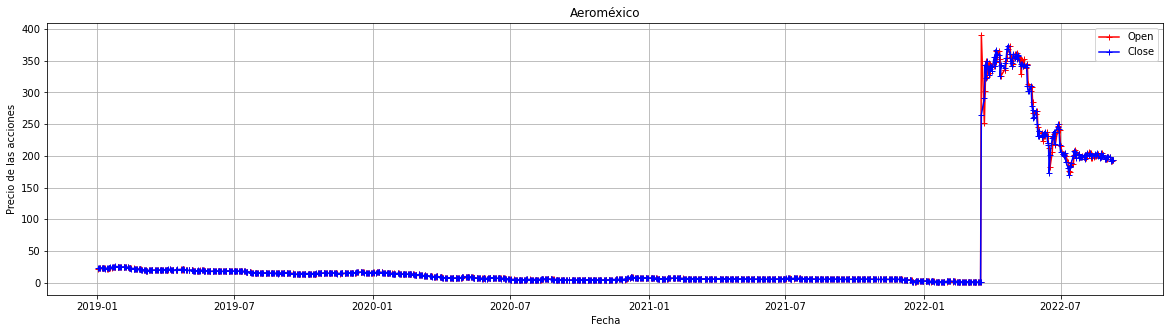

In [26]:
plt.figure(figsize=(20, 5))
plt.plot(AeromexHist['Open'], color='red', marker='+', label='Open')
plt.plot(AeromexHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Aeroméxico')
plt.grid(True)
plt.legend()
plt.show()

# Integrando los datos en un solo análisis

In [27]:
SpotifyClose = SpotifyHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
SpotifyClose.rename(columns = {'Close': 'Spotify'}, inplace = True)
SpotifyClose

,Spotify
Date,
2019-01-02,113.739998
2019-01-03,109.019997
2019-01-04,118.510002
2019-01-07,119.360001
2019-01-08,117.480003
...,...
2022-09-02,104.419998
2022-09-06,102.589996
2022-09-07,105.860001


In [28]:
FacebookClose = FacebookHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
FacebookClose.rename(columns = {'Close': 'Facebook'}, inplace = True)
FacebookClose

,Facebook
Date,
2019-01-02,135.679993
2019-01-03,131.740005
2019-01-04,137.949997
2019-01-07,138.050003
2019-01-08,142.529999
...,...
2022-09-02,160.320007
2022-09-06,158.539993
2022-09-07,160.389999


In [29]:
AmazonClose = AmazonHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AmazonClose.rename(columns = {'Close': 'Amazon'}, inplace = True)
AmazonClose

,Amazon
Date,
2019-01-02,76.956497
2019-01-03,75.014000
2019-01-04,78.769501
2019-01-07,81.475502
2019-01-08,82.829002
...,...
2022-09-02,127.510002
2022-09-06,126.110001
2022-09-07,129.479996


In [30]:
AeromexClose = AeromexHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AeromexClose.rename(columns = {'Close': 'Aeromexico'}, inplace = True)
AeromexClose

,Aeromexico
Date,
2019-01-02,22.530001
2019-01-03,22.770000
2019-01-04,23.160000
2019-01-07,23.270000
2019-01-08,23.230000
...,...
2022-09-02,198.979996
2022-09-05,198.979996
2022-09-06,191.460007


In [32]:
# Se integran los cierres del precio de las acciones
Acciones = pd.concat([SpotifyClose, FacebookClose, AmazonClose, AeromexClose], 
                    axis = 'columns', join = 'inner')
Acciones

,Spotify,Facebook,Amazon,Aeromexico
Date,,,,
2019-01-02,113.739998,135.679993,76.956497,22.530001
2019-01-03,109.019997,131.740005,75.014000,22.770000
2019-01-04,118.510002,137.949997,78.769501,23.160000
2019-01-07,119.360001,138.050003,81.475502,23.270000
2019-01-08,117.480003,142.529999,82.829002,23.230000
...,...,...,...,...
2022-09-01,106.519997,165.360001,127.820000,198.979996
2022-09-02,104.419998,160.320007,127.510002,198.979996
2022-09-06,102.589996,158.539993,126.110001,191.460007


In [33]:
# En caso de tener valores nulos
AccionesNN = Acciones.dropna()
AccionesNN

,Spotify,Facebook,Amazon,Aeromexico
Date,,,,
2019-01-02,113.739998,135.679993,76.956497,22.530001
2019-01-03,109.019997,131.740005,75.014000,22.770000
2019-01-04,118.510002,137.949997,78.769501,23.160000
2019-01-07,119.360001,138.050003,81.475502,23.270000
2019-01-08,117.480003,142.529999,82.829002,23.230000
...,...,...,...,...
2022-09-01,106.519997,165.360001,127.820000,198.979996
2022-09-02,104.419998,160.320007,127.510002,198.979996
2022-09-06,102.589996,158.539993,126.110001,191.460007


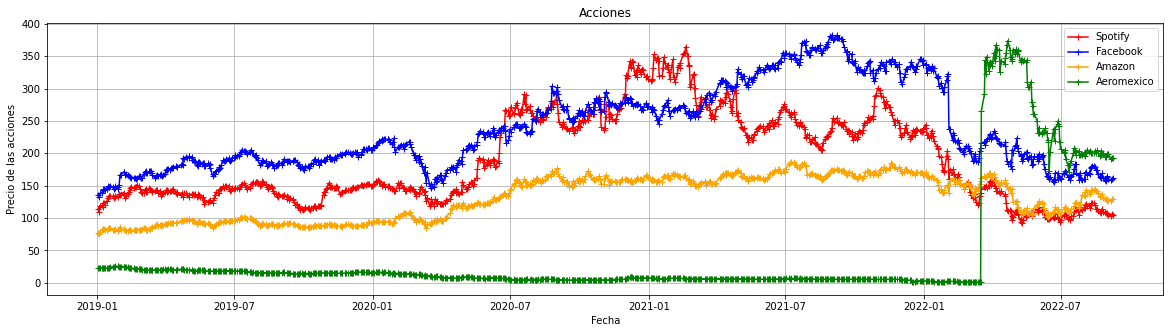

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(Acciones['Spotify'], color='red', marker='+', label='Spotify')
plt.plot(Acciones['Facebook'], color='blue', marker='+', label='Facebook')
plt.plot(Acciones['Amazon'], color='orange', marker='+', label='Amazon')
plt.plot(Acciones['Aeromexico'], color='green', marker='+', label='Aeromexico')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Acciones')
plt.grid(True)
plt.legend()
plt.show()

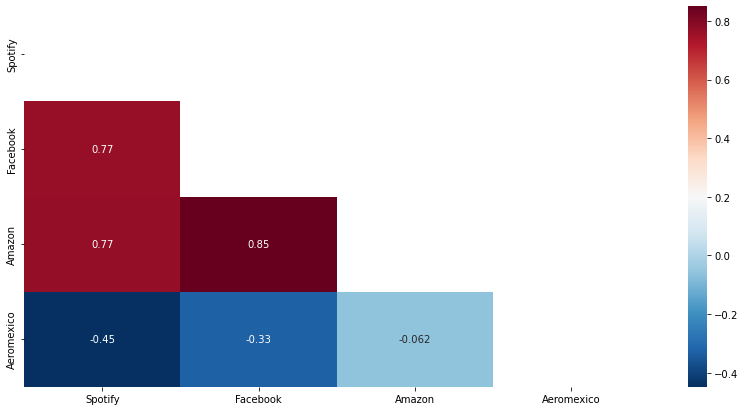

In [35]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Acciones.corr())
sns.heatmap(Acciones.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [36]:
Acciones.corr()

,Spotify,Facebook,Amazon,Aeromexico
Spotify,1.000000,0.765191,0.773088,-0.447994
Facebook,0.765191,1.000000,0.849904,-0.328027
Amazon,0.773088,0.849904,1.000000,-0.061895
Aeromexico,-0.447994,-0.328027,-0.061895,1.000000


In [38]:
DataAcciones = yf.download(['SPOT', 'META', 'AMZN', 'AEROMEX.MX'], start='2019-1-1', end=today, 
                interval='1d')
DataAcciones

[*********************100%***********************]  4 of 4 completed


Adj Close                                           Close  \
            AEROMEX.MX        AMZN        META        SPOT  AEROMEX.MX   
Date                                                                     
2019-01-02   22.530001   76.956497  135.679993  113.739998   22.530001   
2019-01-03   22.770000   75.014000  131.740005  109.019997   22.770000   
2019-01-04   23.160000   78.769501  137.949997  118.510002   23.160000   
2019-01-07   23.270000   81.475502  138.050003  119.360001   23.270000   
2019-01-08   23.230000   82.829002  142.529999  117.480003   23.230000   
...                ...         ...         ...         ...         ...   
2022-09-05  198.979996         NaN         NaN         NaN  198.979996   
2022-09-06  191.460007  126.110001  158.539993  102.589996  191.460007   
2022-09-07  193.029999  129.479996  160.389999  105.860001  193.029999   
2022-09-08  193.029999  129.820007  162.059998  105.180000  193.029999   
2022-09-09         NaN  133.270004  169.149994  110.279999         NaN   

                                                      High              ...  \
                  AMZN        META        SPOT  AEROMEX.MX        AMZN  ...   
Date                                                                    ...   
2019-01-02   76.956497  135.679993  113.739998   23.080000   77.667999  ...   
2019-01-03   75.014000  131.740005  109.019997   23.049999   76.900002  ...   
2019-01-04   78.769501  137.949997  118.510002   23.840000   79.699997  ...   
2019-01-07   81.475502  138.050003  119.360001   24.500000   81.727997  ...   
2019-01-08   82.829002  142.529999  117.480003   23.870001   83.830498  ...   
...                ...         ...         ...         ...         ...  ...   
2022-09-05         NaN         NaN         NaN  198.979996         NaN  ...   
2022-09-06  126.110001  158.539993  102.589996  192.470001  128.619995  ...   
2022-09-07  129.479996  160.389999  105.860001  193.029999  129.820007  ...   
2022-09-08  129.820007  162.059998  105.180000  193.029999  130.279999  ...   
2022-09-09  133.270004  169.149994  110.279999         NaN  133.690002  ...   

                   Low                    Open                          \
                  META        SPOT  AEROMEX.MX        AMZN        META   
Date                                                                     
2019-01-02  128.559998  110.360001   22.000000   73.260002  128.990005   
2019-01-03  131.119995  108.589996   22.500000   76.000504  134.690002   
2019-01-04  133.750000  111.500000   23.430000   76.500000  134.009995   
2019-01-07  135.910004  113.279999   23.180000   80.115501  137.559998   
2019-01-08  139.539993  114.699997   23.219999   83.234497  139.889999   
...                ...         ...         ...         ...         ...   
2022-09-05         NaN         NaN  198.979996         NaN         NaN   
2022-09-06  157.690002  100.620003  192.470001  127.919998  160.100006   
2022-09-07  156.809998  102.349998  191.500000  126.120003  157.759995   
2022-09-08  157.740005  103.720001  193.029999  127.720001  158.710007   
2022-09-09  163.020004  106.110001         NaN  130.910004  163.248001   

                           Volume                                      
                  SPOT AEROMEX.MX         AMZN        META       SPOT  
Date                                                                   
2019-01-02  111.660004    54890.0  159662000.0  28146200.0   861100.0  
2019-01-03  112.080002    88098.0  139512000.0  22717900.0  1082300.0  
2019-01-04  112.059998    69569.0  183652000.0  29002100.0  2484800.0  
2019-01-07  115.040001   160120.0  159864000.0  20089300.0  2516200.0  
2019-01-08  121.440002   190421.0  177628000.0  26263800.0  1257100.0  
...                ...        ...          ...         ...        ...  
2022-09-05         NaN        0.0          NaN         NaN        NaN  
2022-09-06  104.059998      567.0   43888600.0  19339800.0   962800.0  
2022-09-07  102.349998      945.0   4790

In [37]:
# Se muestra para VOO desde Yahoo Finance
DataVOO = yf.Ticker('VOO.MX')
DataVOO

yfinance.Ticker object <VOO.MX>

In [40]:
VOOHist = DataVOO.history(start = '2020-1-1', end = '2022-9-6', interval='1d')
VOOHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,5605.000000,5610.299805,5605.000000,5610.299805,808,0,0
2020-01-03,5590.000000,5650.000000,5588.000000,5618.700195,162,0,0
2020-01-06,5618.700195,5669.850098,5600.000000,5679.924805,496,0,0
2020-01-07,5605.000000,5605.000000,5600.000000,5600.500000,11597,0,0
2020-01-08,5607.000000,5625.899902,5607.000000,5625.899902,586,0,0
...,...,...,...,...,...,...,...
2022-08-30,7435.950195,7435.950195,7352.020020,7365.919922,8016,0,0
2022-08-31,7370.000000,7399.959961,7323.000000,7335.000000,6049,0,0
2022-09-01,7334.990234,7335.000000,7252.020020,7324.709961,160446,0,0


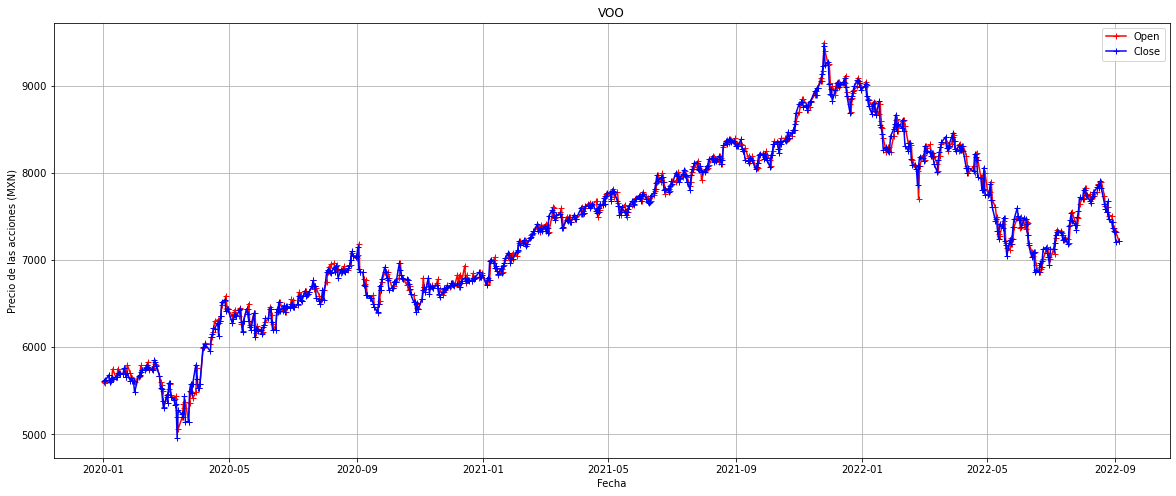

In [44]:
plt.figure(figsize=(20, 8))
plt.plot(VOOHist['Open'], color='red', marker='+', label='Open')
plt.plot(VOOHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones (MXN)')
plt.title('VOO')
plt.grid(True)
plt.legend()
plt.show()